## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#load data
df=pd.read_csv(r'C:/Users/HP/Documents/UDACITY/project3/ab_data.csv')

#print first five rows of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#View Number of rows
nb_rows= df.shape[0]
print('Number of rows in the dataset is {}.'.format(nb_rows))

Number of rows in the dataset is 294478.


c. The number of unique users in the dataset.

In [4]:
# Returns the number of unique users in the dataset
unique=df.user_id.nunique()
print('Number of unique users in the dataset is {}.'.format(unique))

Number of unique users in the dataset is 290584.


d. The proportion of users converted.

In [5]:
#calculate the proportion of users converted
prop_converted =round(df.converted.mean()*100)
print('The proportion of users converted is {}%.'.format(prop_converted))

The proportion of users converted is 12%.


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#The number of times the new_page and treatment don't match.
not_matching=len(df.query('landing_page=="new_page" and group !="treatment"'))+len(df.query('landing_page!="new_page" and group =="treatment"'))
print('The number of times the new_page and treatment don\'t match is {}.'.format(not_matching))

The number of times the new_page and treatment don't match is 3893.


f. Do any of the rows have missing values?

In [7]:
#count total rows in each column which contain null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There is no missing values in our dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#copy dataframe
df2=df.copy()

In [9]:
#create new dataset
df2=df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) | ((df2['group'] == 'control') == (df2['landing_page'] == 'old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Returns the number of unique users in the dataset
unique_users=df2.user_id.nunique()
print('Number of unique users in the dataset is {}.'.format(unique_users))

Number of unique users in the dataset is 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#check for user_id duplicates in the data
user_duplicated=df2[df2.user_id.duplicated(keep=False)].user_id.iloc[0]
print('The duplicated user_id is {}.'.format(user_duplicated))

The duplicated user_id is 773192.


c. What is the row information for the repeat **user_id**? 

In [13]:
#Information about the duplicated row
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#drop duplicated row
df2.drop_duplicates(['user_id'],inplace=True)

In [15]:
# confirm correction by rechecking for duplicates in the data
sum(df2.user_id.duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#Probability of converting regardless of page
converted_prob=df2.converted.mean()
print('The probability of an individual converting regardless of the page they receive is {}.'.format(converted_prob))

The probability of an individual converting regardless of the page they receive is 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#Compute the probability of converting,given that an individual was in the control group.
control_converted=len(df2[(df2['group']=='control') & (df2['converted']==1)])/len(df2[(df2['group']=='control')])
print('Given that an individual was in the control group, the probability of converting is {}.'.format(control_converted))

Given that an individual was in the control group, the probability of converting is 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#Compute the probability of converting,given that an individual was in the treatment group.
treatment_converted=len(df2[(df2['group']=='treatment') & (df2['converted']==1)])/len(df2[(df2['group']=='treatment')])
print('Given that an individual was in the treatment group, the probability of converting is {}.'.format(treatment_converted))

Given that an individual was in the treatment group, the probability of converting is 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [19]:
#The probability that an individual received the new page
new_page_prob=(df2['landing_page']=="new_page").mean()
print('The probability of receiving the new page is {}.'.format(new_page_prob))

The probability of receiving the new page is 0.5000619442226688.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>According to the first investigations, there is no sufficient evidence to say that the new treatment page leads to more conversions, since the conversion probability  in the treatment group (0.119 ∼ 0.12) is almost equal to the conversion probability in the control group(0.12). So, it is important to consider other factors.

In [20]:
#difference between the two probabilities
diff_obs=treatment_converted-control_converted
diff_obs

-0.0015782389853555567

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} \geq 0$$


$$H_1: p_{old} - p_{new} < 0$$


** $p_{old}$ and $p_{new}$ are the converted rates for the old and new pages

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# Compute and display the convert rate for  𝑝𝑛𝑒𝑤  under the null
p_new=converted_prob
print('The converted rate for the new page under the null is {}.'.format(p_new))

The converted rate for the new page under the null is 0.11959708724499628.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Compute and display the convert rate for  𝑝old  under the null
p_old=converted_prob
print('The converted rate for the old page under the null is {}.'.format(p_old))

The converted rate for the old page under the null is 0.11959708724499628.


c. What is $n_{new}$?

In [23]:
#calculate number of queries when landing_page is equal to new_page
n_new=len(df2[(df2['landing_page']=='new_page')])
print('The number of queries when landing_page is equal to new_page is {}.'.format(n_new))

The number of queries when landing_page is equal to new_page is 145310.


d. What is $n_{old}$?

In [24]:
#calculate number of queries when landing_page is equal to old_page
n_old=len(df2[(df2['landing_page']=='old_page')])
print('The number of queries when landing_page is equal to old_page is {}.'.format(n_old))

The number of queries when landing_page is equal to old_page is 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#Simulate  𝑛_𝑛𝑒𝑤  transactions with a convert rate of  𝑝_𝑛𝑒𝑤  under the null and store it
new_page_converted= np.random.binomial(n_new, p_new)


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# Simulate  𝑛_𝑜𝑙𝑑  transactions with a convert rate of  𝑝_𝑜𝑙𝑑  under the null and store it
old_page_converted=np.random.binomial(n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#compute 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑 for the simulated values
p_new=new_page_converted/n_new
p_old=old_page_converted/n_old
difference= p_new-p_old
print('The difference "𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑"  for the simulated values is {}.'.format(diff_obs))

The difference "𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑"  for the simulated values is -0.0015782389853555567.


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
#Simulate 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

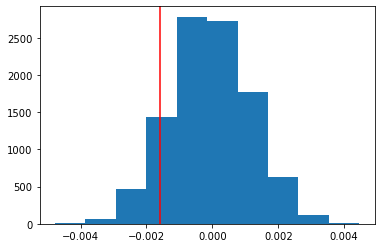

In [29]:
#convert to numpay array
p_diffs=np.array(p_diffs)
#plot sampling distribution
plt.hist(p_diffs);
# plot line for observed statistic
plt.axvline(x=diff_obs, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# compute p value
( p_diffs>diff_obs).mean()

0.8939

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>The value that i have computed in part j is called "**p-value**".  If the p-value is less than our Type I error threshold(0.05), then we have evidence to reject the null and choose the alternative. Otherwise, we fail to reject the null hypothesis.
In our case,  the p_value is greater than 0.05, so **we fail to reject the $H_0: p_{old} - p_{new} \geq 0$**. In other terms, the old page is better than  or equal to the new page in terms of conversion.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page']=='old_page') & (df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page') & (df2['converted']==1)])
n_old = len(df2[(df2['landing_page']=='old_page')])
n_new = len(df2[(df2['landing_page']=='new_page')])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
#compute z test and p_value
from scipy.stats import norm

n_obs = [n_old, n_new]
count = [convert_old, convert_new]
z_score, p_value = sm.stats.proportions_ztest(count, n_obs, alternative='smaller')

# the significance of our z_score
norm.cdf(z_score)
#critical value of 95% confidence
critical_value = norm.ppf(1-(0.05/2))

print ("z_score = {}, p_value = {} and critical_value = {} ".format(round(z_score,2),round(p_value,2),round(critical_value,2)))

z_score = 1.31, p_value = 0.91 and critical_value = 1.96 


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The Z score computed in the previous question is the standard deviation away from the mean and the p_value is the probability. 
I found that the z-score (**1.31**) is less than the critical value of 95% confidence level(**1.96**). Thus, **we fail to reject the null hypothesis** and this is in line with the findings in parts j. and k.



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since each row is either a conversion or no conversion (binary/categorical data),we should use the "Logistic regression".


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
#add an intercept column
df2['intercept']=1
#create dummy variable
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
#first regression model to predict whether or not an individual converts.
log_model=sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
#summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:18:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

>The p-value from the logit regression help us to indicate if a particular variable is statistically significant in predicting the dependent variable. In our case the p-value associated with ab_page is equal to **0.19 > 0.05** (**fail to reject the null hypothesis**) so the variable is not statistically significant and is not a relevant predicting variable. 
It differs from the value we found in part II, because **this is a two-sided t-test** compared to a one-sided t-test in part II. The hypotheses for the regression analysis are :
$$H_0: p_{old} - p_{new} = 0$$


$$H_1: p_{old} - p_{new} ≠ 0$$




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Based on our findings that there is no a significant relationship between conversion and landing page (p-value for ab_page isn’t statistically significant), so it is worth exploring whether other variables that may influence the conversion, such as the user's gender, location, age....
However, adding additional variables to our regression model means that we will **reduce the number of degrees of freedom**, especially If we have a small dataset. An other disadvantage of adding additional terms into a regression model is **collinearity**. When adding more predictor variables, they might end up correlated with each other. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
#Inner join two datasets
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [37]:
#check which countries are in the dataset
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [38]:
# Create the necessary dummy variables 
df_new[['CA', 'UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [39]:
# second logit model
df_new['intercept']=1
log_model2=sm.Logit(df_new['converted'], df_new[['intercept','UK','US','ab_page']])#'CA' is the baseline
results2=log_model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:18:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

>**There is no significant p-value(all higher than 0.05) even after the addition of country dependent conversion.Therefore we fail to reject the null hypothesis.** 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
#Create additional columns-interaction between page and country
df_new['US_page']=df_new['ab_page']*df_new['US']
df_new['UK_page']=df_new['ab_page']*df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [41]:
#Fit Linear Model And Obtain the Results
log_model3=sm.Logit(df_new['converted'], df_new[['intercept','UK','US','ab_page','US_page','UK_page']])
results3=log_model3.fit()
results3.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Oct 2020   Pseudo R-squ.:               3.482e-05
Time:                        23:18:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

>**There is no significant p-value(all higher than 0.05) even after the addition of country dependent conversion and the interactions between page and country.Therefore we fail to reject the null hypothesis.** 

<a id='conclusions'></a>
## Conclusions

>After all the statistical tests that we have carried out, we conclude that there is no statistical evidence that the new_page is doing better. So the company should stay on the old_page only. 

